## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [15]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Data exploration

In [16]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")
columns_to_drop = ["DoctorInCharge","PatientID"]
random_seed=1234

## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. Also cleaning the data makes it readily usable.

In [17]:

def clean_data(raw_data,response_column=None, columns=None):
    if columns is None:
        columns = []
    ## copying Predictor variable data to a new variable
    predictor_data=raw_data.copy()
    columns.append(response_column)
    predictor_data.drop(columns,axis=1,inplace=True)
    response_data=raw_data[response_column]
    return predictor_data,response_data

X_data,Y_data=clean_data(raw_data=df,response_column='Diagnosis',columns=columns_to_drop)


Let's Normalize the data, since we're using lasso regression here, Lasso regression is useful when our predictors are covariant and normalization is essential for lasso regression.


In [18]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
##standardizing data.
x = X_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled =pd.DataFrame(min_max_scaler.fit_transform(x)) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_data, test_size=0.2, random_state=random_seed)


In [19]:
#implement lasso regression with MSE (Mean squared error) as the predictor variables exhibit covariance.
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
coefficients = lasso.coef_
intercept = lasso.intercept_


Visualizing a heatmap for correlation between predictor . This helps us understand the relationship between predictor variable and their significance to the response variable ( the column 'Diagnosis', in our case ).

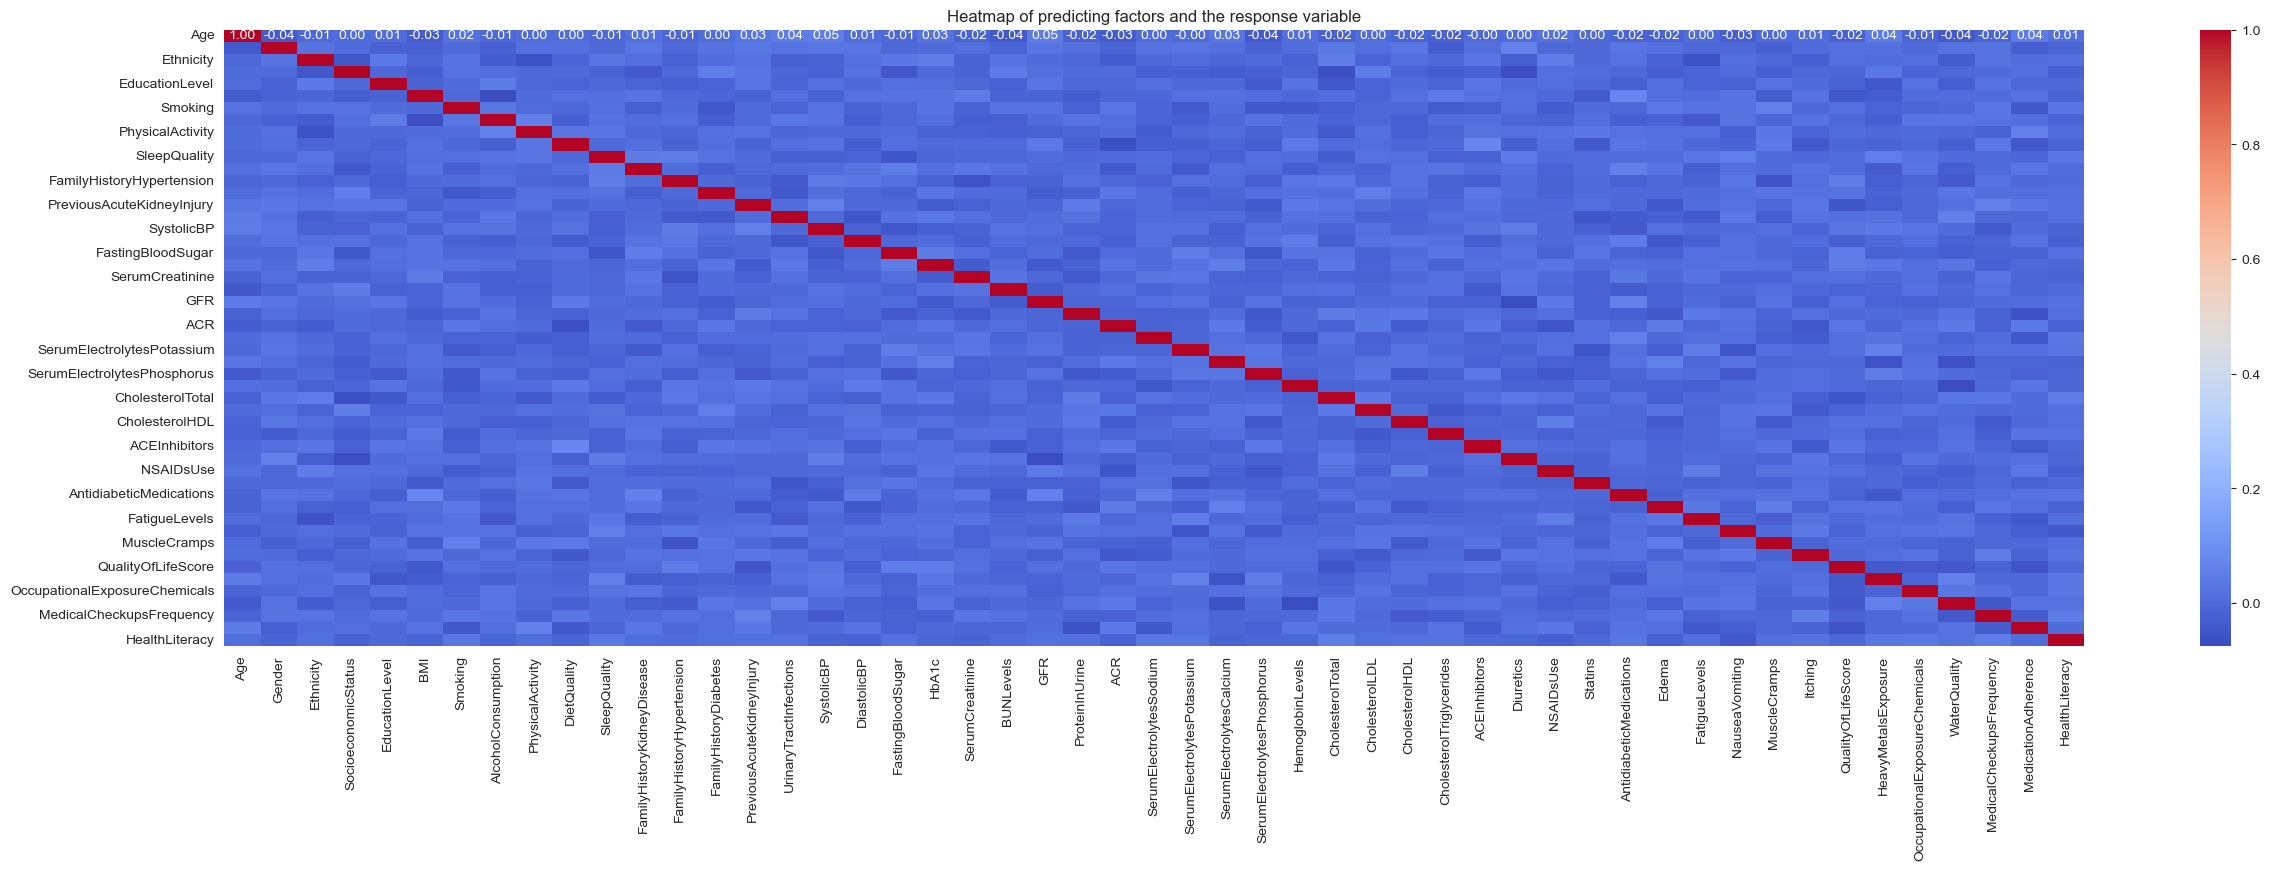

In [20]:
corr_matrix = X_data.corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of predicting factors and the response variable')
plt.show()

Once we've visualized the correlation between our predictor variables, let's visualize the results and accuracy of our prediction on a graph.

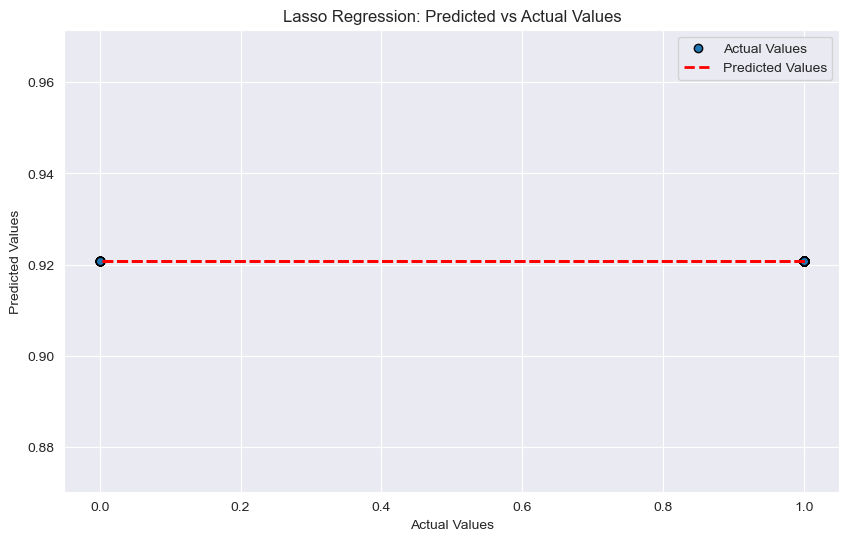

In [41]:
# Plotting Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot(y_test,y_pred, 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Predicted vs Actual Values')
plt.legend(['Actual Values', 'Predicted Values'])
plt.show()

As seen here, the predicted values are reasonalbe close to actual values, making lasso regression a viable method for our dataset.

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [22]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
df.describe(exclude=None)


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.0000

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

In [23]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis

# Zarrin
### To be done

The dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

In [24]:
# Add code for scatter plot

# Katreyna
### To be done

Scatterplot showing 'GFR' and 'SerumCreatinine'

In [25]:
# Add code for scatter plot

# Katreyna 
### To be done


For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

In [26]:
# Add code for frequency tables/bar charts for categorical features


categorical_features = [
    # demographic
    'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
    ]



# Zarrin
### To be done

## 3. Bivariate Analysis

### 1. Correlation Analysis

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [27]:
# Add code for correlation matrix


# Anjali
### To be done


Visualize correlations using heatmaps to identify strong correlations (>0.5 or <-0.5) among variables.

Intrepret Correlation coefficient from the heatmap to indicate positive/negative/0/strength of relationships. For eg: test association of Edema and CKD diagnosis

In [28]:
# Add code for correlation heatmap


# Adithya
### To be done

### 2. Relationships with CKD

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


In [29]:
# Add code for box plot


# Katreyna
### To be done


Use t-tests to assess statistical differences in means between groups for continuous variables.

E.g: Perform a t-test to see if there is a significant difference in the Serum Creatinine levels (SerumCreatinine) between patients diagnosed with Chronic Kidney Disease (CKD) (Diagnosis = 1) and those without CKD (Diagnosis = 0).

Make the Hypothesis statement and Alternative hypothesis statement.

In [30]:
# add code for t-test

# Adithya
### To be done

## Models

Lets find what factors can predict the likelihood of a patient having Chronic Kidney Disease (CKD)?

## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



In [31]:
# add code here

# Kateryna
### To be done

Plots to show the model:

1. ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.

2. Variable coefficient plot: Display coefficients of predictors to understand their impact on CKD likelihood.

In [32]:
# Add code here

# Anjali
### To be done

## Logistic regression analysis to determine odds ratios

Perform logistic regression analysis to determine odds ratios and assess the significance of variables such as hypertension, diabetes, and medication use in relation to Chronic Kidney Disease (CKD).
Choosing the following independent variables (predictors) to include in the logistic regression model:

1. Hypertension (FamilyHistoryHypertension)
2. Diabetes (FamilyHistoryDiabetes or AntidiabeticMedications)
3. Medication use (ACEInhibitors, Diuretics, Statins, NSAIDsUse, etc.)

In [33]:
# Add code here

# Anjali
### To be done

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [34]:
# Add code here

# Anjali
### To be done

## Linear Regression

Add action item here


# add description and action item

In [35]:
# Add code here

# Zarrin
### To be done